In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta
import os

import pandas_datareader as pdr
from darts import TimeSeries
from darts.models import ExponentialSmoothing, AutoARIMA, Prophet

import warnings
warnings.filterwarnings('ignore')

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Bitcoin ##

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
if os.path.exists("btc.csv"):
    bitcoin_data = pd.read_csv("btc.csv", index_col=0)
else:
    bitcoin_data = btc_ticker.history(period="max")
    bitcoin_data.to_csv("btc.csv")

In [4]:
bitcoin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-26 00:00:00+00:00,93087.281250,94991.750000,90770.812500,91985.320312,91656519855,0.0,0.0
2024-11-27 00:00:00+00:00,91978.140625,97361.179688,91778.664062,95962.531250,71133452438,0.0,0.0
2024-11-28 00:00:00+00:00,95954.945312,96650.203125,94677.351562,95652.468750,52260008261,0.0,0.0


In [5]:
bitcoin_data.index = pd.to_datetime(bitcoin_data.index)

In [6]:
bitcoin_data.index = bitcoin_data.index.date
bitcoin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-26,93087.281250,94991.750000,90770.812500,91985.320312,91656519855,0.0,0.0
2024-11-27,91978.140625,97361.179688,91778.664062,95962.531250,71133452438,0.0,0.0
2024-11-28,95954.945312,96650.203125,94677.351562,95652.468750,52260008261,0.0,0.0
2024-11-29,95653.953125,98693.171875,95407.882812,97461.523438,54968682476,0.0,0.0


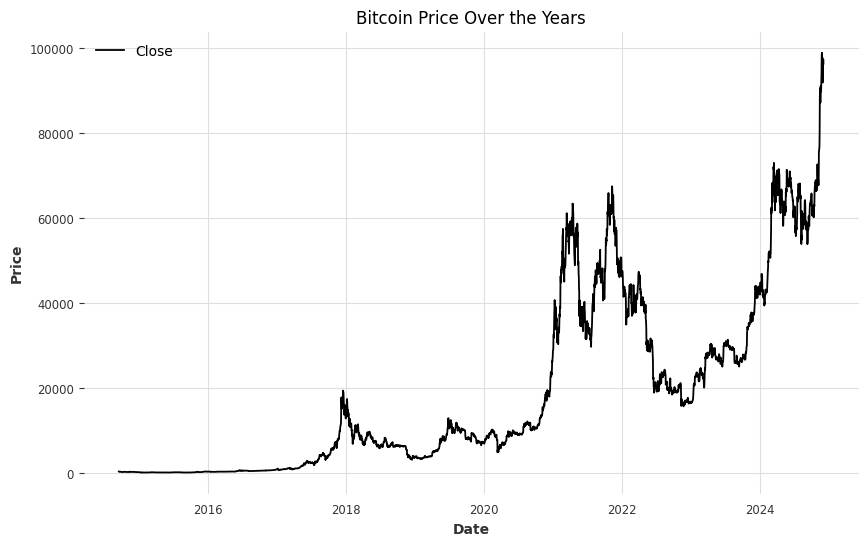

In [7]:
bitcoin_data.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('Bitcoin Price Over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [8]:
date_to_check = '2024-11-01'

# Ensure the index is of datetime type
bitcoin_data.index = pd.to_datetime(bitcoin_data.index)

# Check if the date exists using .loc
if date_to_check in bitcoin_data.index:
    print(f"Data for {date_to_check} exists:")
    print(bitcoin_data.loc[date_to_check])
else:
    print(f"Data for {date_to_check} does not exist.")

Data for 2024-11-01 exists:
Open            7.021690e+04
High            7.155902e+04
Low             6.877970e+04
Close           6.948247e+04
Volume          4.998980e+10
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2024-11-01 00:00:00, dtype: float64


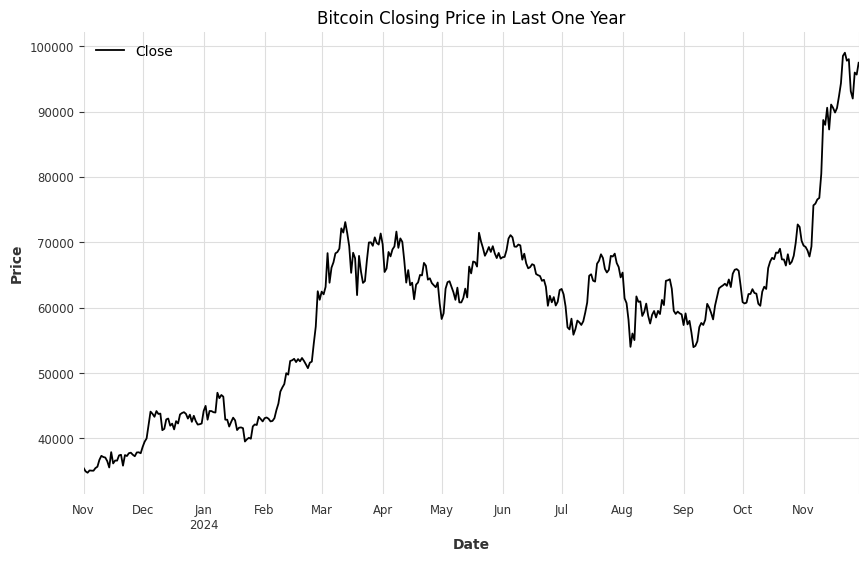

In [41]:
btc_one_year = bitcoin_data.loc['2023-11-01':'2024-11-29']
btc_one_year.plot.line(y='Close',figsize=(10,6),use_index=True)
plt.title('Bitcoin Closing Price in Last One Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [10]:
wiki = pd.read_csv("https://raw.githubusercontent.com/preetsanjam/Crypto_Price_Analysis/refs/heads/main/Datasets/bitcoin_wikipedia_edits.csv", index_col=0, parse_dates=True)

In [11]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-11-26,0.533333,-0.007295,0.113889
2024-11-27,0.633333,-0.040520,0.147222
2024-11-28,0.533333,-0.051112,0.136111
2024-11-29,0.533333,-0.051112,0.136111


In [12]:
wiki.columns = [col.title() for col in wiki.columns]
wiki.columns

Index(['Edit_Count', 'Sentiment', 'Neg_Sentiment'], dtype='object')

In [13]:
bitcoin_data = bitcoin_data.merge(wiki, left_index=True, right_index=True)

In [14]:
bitcoin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Edit_Count,Sentiment,Neg_Sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,5.033333,-0.232192,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,5.233333,-0.204018,0.532718
...,...,...,...,...,...,...,...,...,...,...
2024-11-26,93087.281250,94991.750000,90770.812500,91985.320312,91656519855,0.0,0.0,0.533333,-0.007295,0.113889
2024-11-27,91978.140625,97361.179688,91778.664062,95962.531250,71133452438,0.0,0.0,0.633333,-0.040520,0.147222
2024-11-28,95954.945312,96650.203125,94677.351562,95652.468750,52260008261,0.0,0.0,0.533333,-0.051112,0.136111
2024-11-29,95653.953125,98693.171875,95407.882812,97461.523438,54968682476,0.0,0.0,0.533333,-0.051112,0.136111


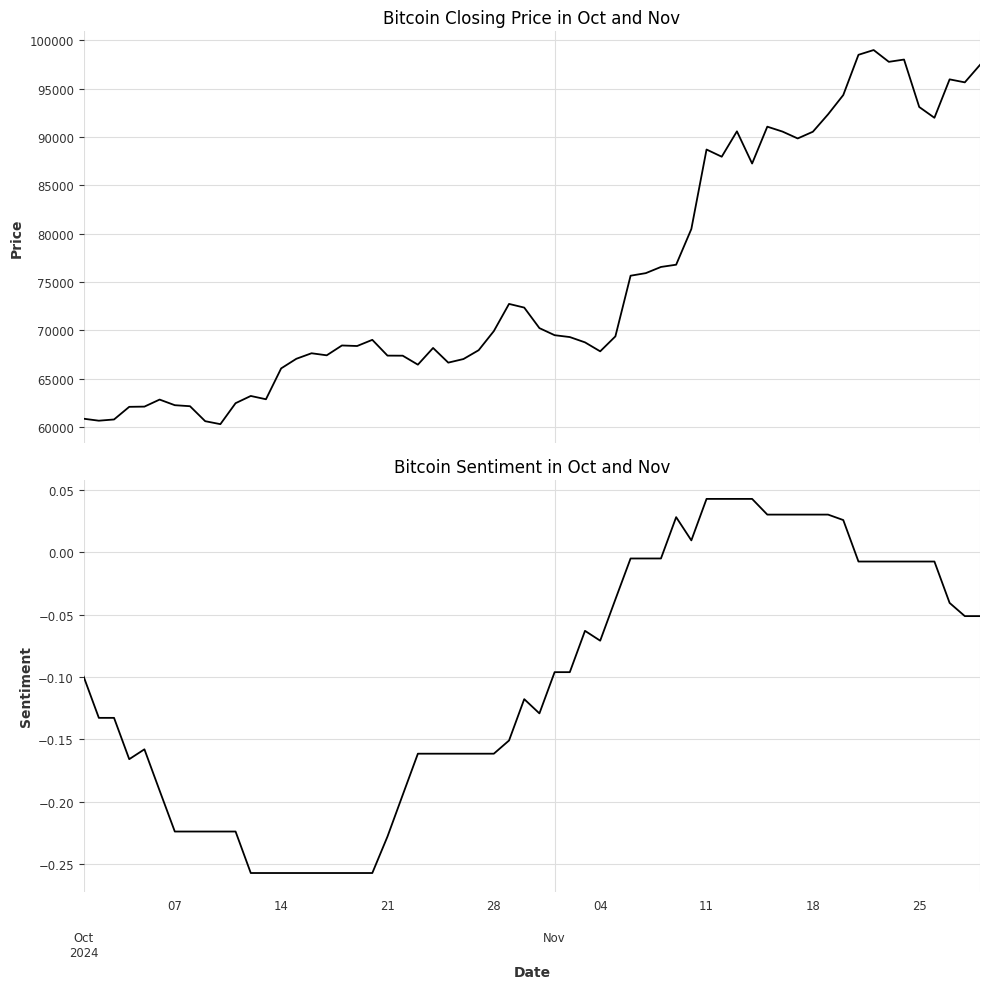

In [15]:
bitcoin_subset = bitcoin_data.loc['2024-10-01':'2024-11-29']

# Define the figure and subplots
fig, axes = plt.subplots(2,1, figsize=(10, 10), sharex=True)

# First subplot: Bitcoin Closing Prices
bitcoin_subset['Close'].plot(
    ax=axes[0],
    title='Bitcoin Closing Price in Oct and Nov',
    ylabel='Price'
)

# Second subplot: Bitcoin Sentiment
bitcoin_subset['Sentiment'].plot(
    ax=axes[1],
    title='Bitcoin Sentiment in Oct and Nov',
    ylabel='Sentiment'
)

# Add a shared x-axis label
axes[1].set_xlabel('Date')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Dogecoin ## 

In [16]:
doge_ticker = yf.Ticker("DOGE-USD")

In [17]:
if os.path.exists('doge.csv'):
    doge_data = pd.read_csv('doge.csv', index_col=0)
else:
    doge_data = doge_ticker.history(period='max')
    doge_data.to_csv('doge.csv')

In [18]:
doge_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,0.001207,0.001415,0.001181,0.001415,6259550,0.0,0.0
2017-11-10 00:00:00+00:00,0.001421,0.001431,0.001125,0.001163,4246520,0.0,0.0
2017-11-11 00:00:00+00:00,0.001146,0.001257,0.001141,0.001201,2231080,0.0,0.0
2017-11-12 00:00:00+00:00,0.001189,0.001210,0.001002,0.001038,3288960,0.0,0.0
2017-11-13 00:00:00+00:00,0.001046,0.001212,0.001019,0.001211,2481270,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-26 00:00:00+00:00,0.393311,0.408372,0.367319,0.387618,8847260920,0.0,0.0
2024-11-27 00:00:00+00:00,0.387615,0.408052,0.381691,0.401525,6388400976,0.0,0.0
2024-11-28 00:00:00+00:00,0.401515,0.427305,0.392259,0.402018,5955119388,0.0,0.0


In [19]:
doge_data.index = pd.to_datetime(doge_data.index)

In [20]:
doge_data.drop(['Dividends', 'Stock Splits'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09 00:00:00+00:00,0.001207,0.001415,0.001181,0.001415,6259550
2017-11-10 00:00:00+00:00,0.001421,0.001431,0.001125,0.001163,4246520
2017-11-11 00:00:00+00:00,0.001146,0.001257,0.001141,0.001201,2231080
2017-11-12 00:00:00+00:00,0.001189,0.001210,0.001002,0.001038,3288960
2017-11-13 00:00:00+00:00,0.001046,0.001212,0.001019,0.001211,2481270
...,...,...,...,...,...
2024-11-26 00:00:00+00:00,0.393311,0.408372,0.367319,0.387618,8847260920
2024-11-27 00:00:00+00:00,0.387615,0.408052,0.381691,0.401525,6388400976
2024-11-28 00:00:00+00:00,0.401515,0.427305,0.392259,0.402018,5955119388


In [21]:
doge_data.index = doge_data.index.date
doge_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,0.0,0.0
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,0.0,0.0
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,0.0,0.0
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,0.0,0.0
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-26,0.393311,0.408372,0.367319,0.387618,8847260920,0.0,0.0
2024-11-27,0.387615,0.408052,0.381691,0.401525,6388400976,0.0,0.0
2024-11-28,0.401515,0.427305,0.392259,0.402018,5955119388,0.0,0.0
2024-11-29,0.402019,0.437086,0.399992,0.425839,6768739922,0.0,0.0


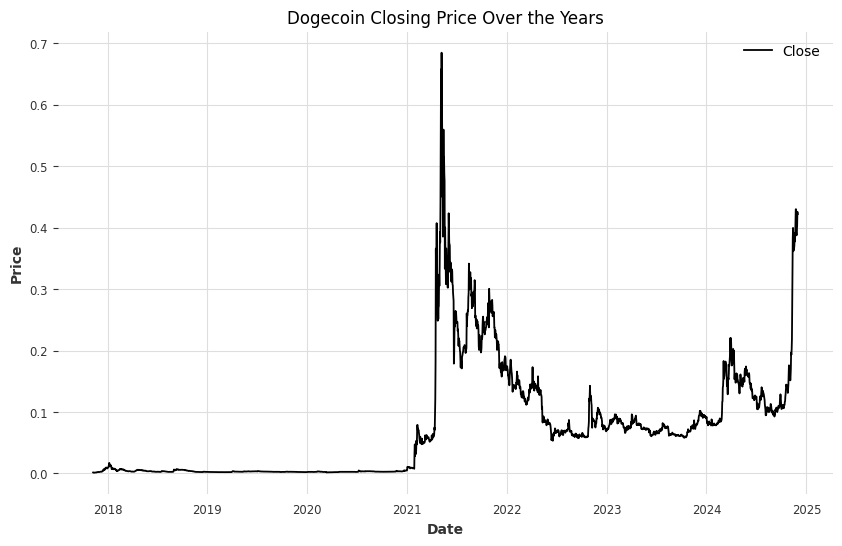

In [22]:
doge_data.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('Dogecoin Closing Price Over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [23]:
date_to_check = '2023-11-01'

doge_data.index = pd.to_datetime(doge_data.index)

if date_to_check in doge_data.index:
    print(f"Date for {date_to_check} exists.")
    print(doge_data.loc[date_to_check])
else:
    print(f"Date for {date_to_check} does not exist.")

Date for 2023-11-01 exists.
Open            6.827900e-02
High            6.955400e-02
Low             6.612900e-02
Close           6.884100e-02
Volume          4.615390e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2023-11-01 00:00:00, dtype: float64


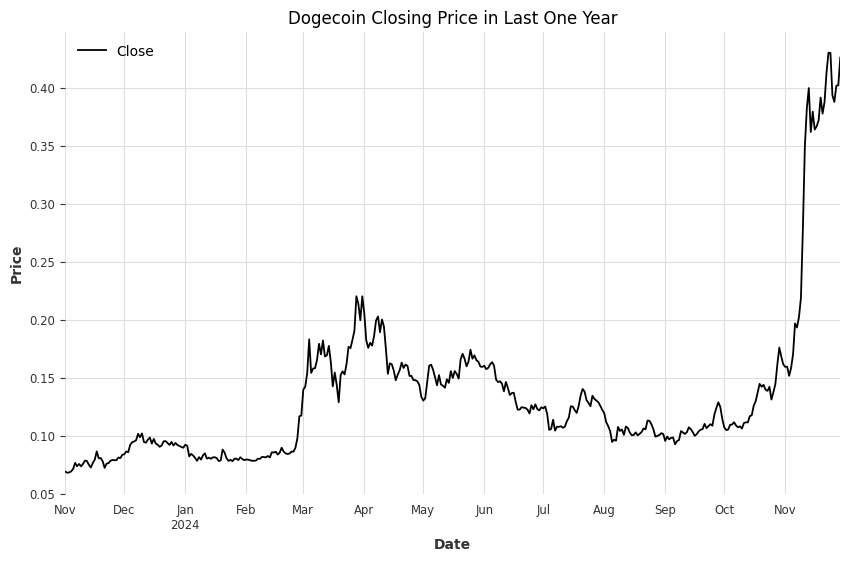

In [24]:
doge_one_year = doge_data.loc['2023-11-01':'2024-11-29']
doge_one_year.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('Dogecoin Closing Price in Last One Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [25]:
# Loading wiki df 
wiki = pd.read_csv('https://raw.githubusercontent.com/preetsanjam/Crypto_Price_Analysis/refs/heads/main/Datasets/doge_wikipedia_edits.csv', index_col = 0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2014-01-12,8.766667,-0.113297,0.424761
2014-01-13,5.133333,-0.161805,0.452034
2014-01-14,3.666667,-0.145299,0.443287
2014-01-15,3.133333,-0.146360,0.428704
2014-01-16,3.133333,-0.146335,0.428704
...,...,...,...
2024-11-26,0.166667,0.013405,0.050000
2024-11-27,0.166667,0.013405,0.050000
2024-11-28,0.166667,0.013405,0.050000
2024-11-29,0.200000,-0.019775,0.083333


In [26]:
wiki.columns = [col.title() for col in wiki.columns]
wiki.columns

Index(['Edit_Count', 'Sentiment', 'Neg_Sentiment'], dtype='object')

In [27]:
doge_wiki_data = doge_data.merge(wiki, left_index=True, right_index=True)
doge_wiki_data 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Edit_Count,Sentiment,Neg_Sentiment
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,0.0,0.0,0.466667,-0.165739,0.190476
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,0.0,0.0,0.500000,-0.140801,0.190476
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,0.0,0.0,0.466667,-0.107504,0.157143
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,0.0,0.0,0.533333,-0.131346,0.190476
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,0.0,0.0,0.533333,-0.131346,0.190476
...,...,...,...,...,...,...,...,...,...,...
2024-11-26,0.393311,0.408372,0.367319,0.387618,8847260920,0.0,0.0,0.166667,0.013405,0.050000
2024-11-27,0.387615,0.408052,0.381691,0.401525,6388400976,0.0,0.0,0.166667,0.013405,0.050000
2024-11-28,0.401515,0.427305,0.392259,0.402018,5955119388,0.0,0.0,0.166667,0.013405,0.050000
2024-11-29,0.402019,0.437086,0.399992,0.425839,6768739922,0.0,0.0,0.200000,-0.019775,0.083333


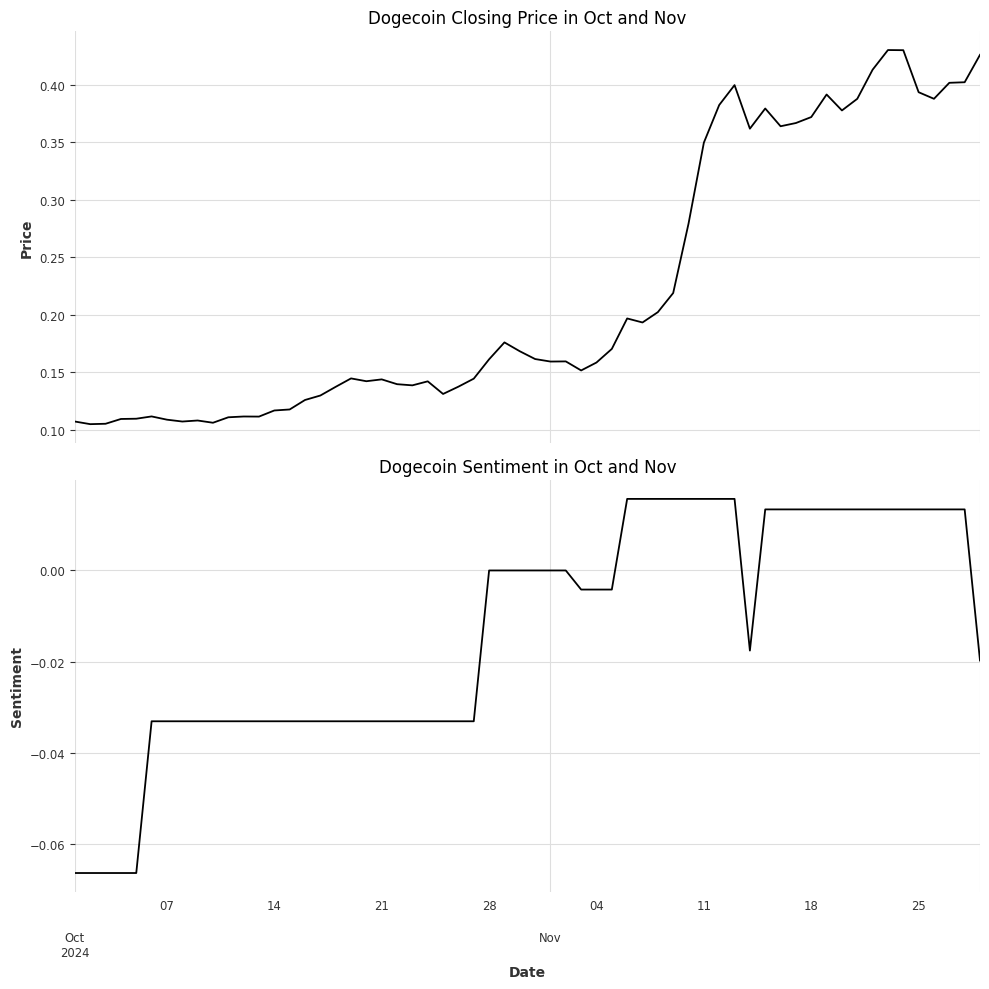

In [28]:
doge_subset = doge_wiki_data.loc['2024-10-01':'2024-11-29']

# Define the figure and subplots
fig, axes = plt.subplots(2,1, figsize=(10, 10), sharex=True)

# First subplot: Doge Closing Prices
doge_subset['Close'].plot(
    ax=axes[0],
    title='Dogecoin Closing Price in Oct and Nov',
    ylabel='Price'
)

# Second subplot: Bitcoin Sentiment
doge_subset['Sentiment'].plot(
    ax=axes[1],
    title='Dogecoin Sentiment in Oct and Nov',
    ylabel='Sentiment'
)

# Add a shared x-axis label
axes[1].set_xlabel('Date')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Ethereum ##

In [29]:
ethereum_ticker = yf.Ticker('ETH-USD')

In [30]:
if os.path.exists('ethereum.csv'):
    ethereum_data = pd.read_csv('ethereum.csv', index_col = 0)
else:
    ethereum_data = ethereum_ticker.history(period='max')
    ethereum_data.to_csv('ethereum.csv')

In [31]:
ethereum_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-26 00:00:00+00:00,3412.950928,3461.292969,3255.542969,3326.517334,39902959158,0.0,0.0
2024-11-27 00:00:00+00:00,3326.029053,3687.009033,3303.567871,3657.249268,43383987191,0.0,0.0
2024-11-28 00:00:00+00:00,3656.609619,3664.878174,3531.870605,3579.811523,32362724276,0.0,0.0


In [32]:
ethereum_data.index = pd.to_datetime(ethereum_data.index)

In [33]:
ethereum_data.index = ethereum_data.index.date
ethereum_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-26,3412.950928,3461.292969,3255.542969,3326.517334,39902959158,0.0,0.0
2024-11-27,3326.029053,3687.009033,3303.567871,3657.249268,43383987191,0.0,0.0
2024-11-28,3656.609619,3664.878174,3531.870605,3579.811523,32362724276,0.0,0.0
2024-11-29,3579.910645,3647.264404,3538.446777,3593.494385,27622629486,0.0,0.0


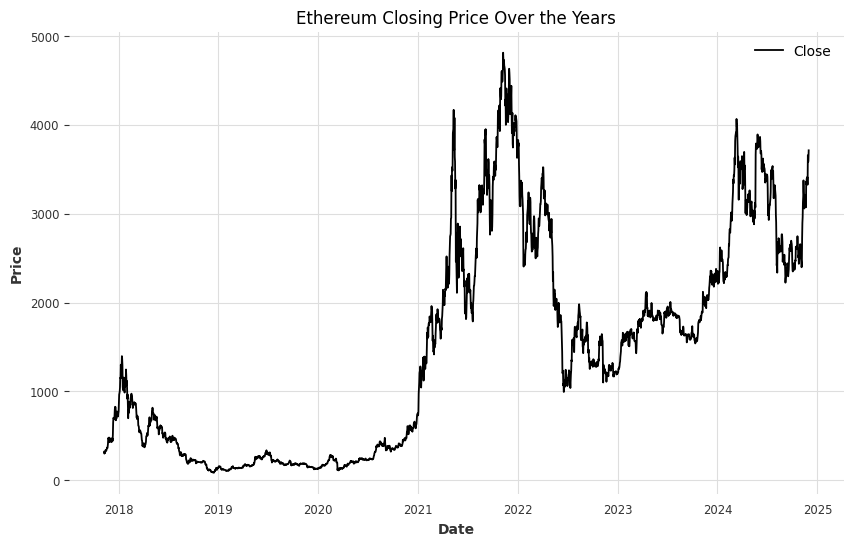

In [34]:
ethereum_data.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('Ethereum Closing Price Over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [35]:
ethereum_data.index = pd.to_datetime(ethereum_data.index) 

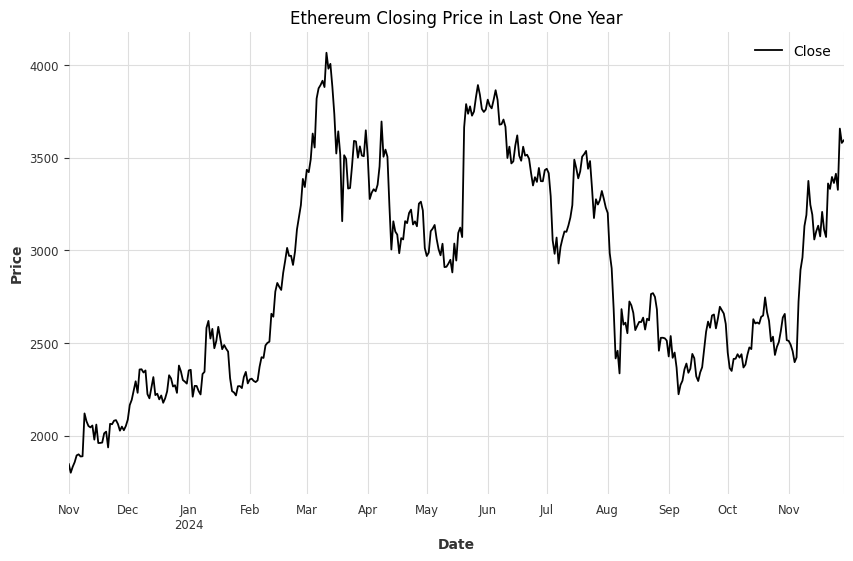

In [36]:
ethereum_one_year = ethereum_data.loc['2023-11-01':'2024-11-29']
ethereum_one_year.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('Ethereum Closing Price in Last One Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [37]:
wiki = pd.read_csv('https://raw.githubusercontent.com/preetsanjam/Crypto_Price_Analysis/refs/heads/main/Datasets/ethereum_wikipedia_edits.csv', index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2014-02-25,0.066667,-0.066526,0.066667
2014-02-26,0.033333,-0.033243,0.033333
2014-02-27,0.033333,-0.033243,0.033333
2014-02-28,0.033333,-0.033243,0.033333
2014-03-01,0.033333,-0.033243,0.033333
...,...,...,...
2024-11-26,0.033333,-0.033160,0.033333
2024-11-27,0.033333,-0.033160,0.033333
2024-11-28,0.033333,-0.033160,0.033333
2024-11-29,0.033333,-0.033160,0.033333


In [38]:
wiki.columns = [col.title() for col in wiki.columns]
wiki.columns

Index(['Edit_Count', 'Sentiment', 'Neg_Sentiment'], dtype='object')

In [39]:
ethereum_wiki_data = ethereum_data.merge(wiki, left_index=True, right_index=True)
ethereum_wiki_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Edit_Count,Sentiment,Neg_Sentiment
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0,0.900000,-0.144123,0.261111
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0,0.966667,-0.177429,0.294444
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0,0.966667,-0.177429,0.294444
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0,0.966667,-0.177429,0.294444
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0,1.100000,-0.209260,0.327778
...,...,...,...,...,...,...,...,...,...,...
2024-11-26,3412.950928,3461.292969,3255.542969,3326.517334,39902959158,0.0,0.0,0.033333,-0.033160,0.033333
2024-11-27,3326.029053,3687.009033,3303.567871,3657.249268,43383987191,0.0,0.0,0.033333,-0.033160,0.033333
2024-11-28,3656.609619,3664.878174,3531.870605,3579.811523,32362724276,0.0,0.0,0.033333,-0.033160,0.033333
2024-11-29,3579.910645,3647.264404,3538.446777,3593.494385,27622629486,0.0,0.0,0.033333,-0.033160,0.033333


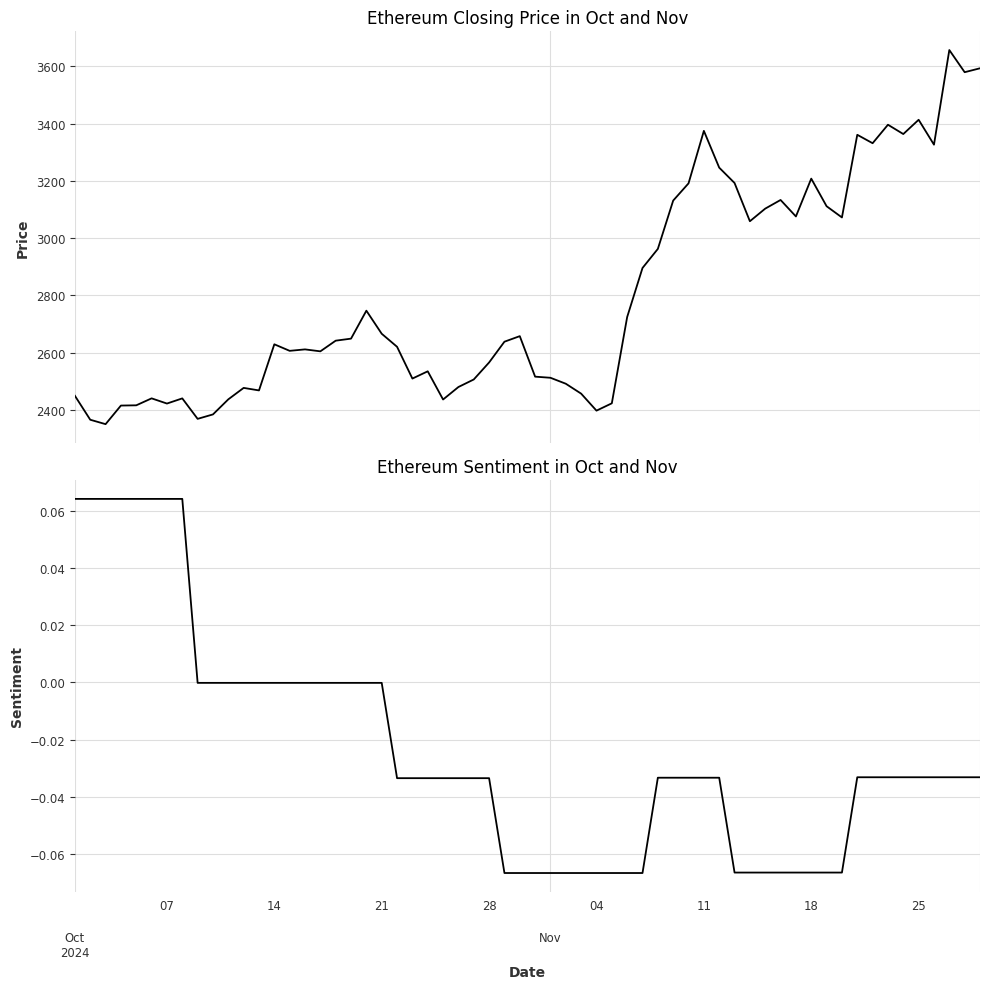

In [40]:
ethereum_subset = ethereum_wiki_data.loc['2024-10-01':'2024-11-29']

# Define the figure and subplots
fig, axes = plt.subplots(2,1, figsize=(10, 10), sharex=True)

# First subplot: Ethereum Closing Prices
ethereum_subset['Close'].plot(
    ax=axes[0],
    title='Ethereum Closing Price in Oct and Nov',
    ylabel='Price'
)

# Second subplot: Ethereum Sentiment
ethereum_subset['Sentiment'].plot(
    ax=axes[1],
    title='Ethereum Sentiment in Oct and Nov',
    ylabel='Sentiment'
)

# Add a shared x-axis label
axes[1].set_xlabel('Date')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()